In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

CHANNEL8 = ['T4-Cz','Fp2-Cz','C4-Cz','O2-Cz','O1-Cz','Fp1-Cz','C3-Cz','T3-Cz']

In [2]:
bc_orig = [None for _ in range(4)]
nk_orig = [None for _ in range(4)]
on_o = [None for _ in range(4)]
on_c = [None for _ in range(4)]

for i in range(4):
    bc_orig[i] = np.load('day2/bc'+str(i)+'.npy')
    nk_orig[i] = np.load('day2/nk'+str(i)+'.npy')
    on_o[i] = np.load('day2/on_o'+str(i)+'.npy')
    on_c[i] = np.load('day2/on_c'+str(i)+'.npy')

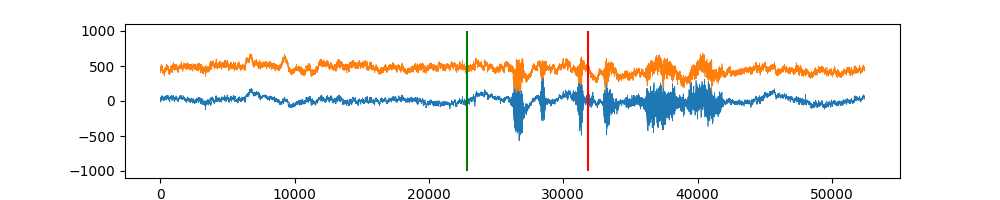

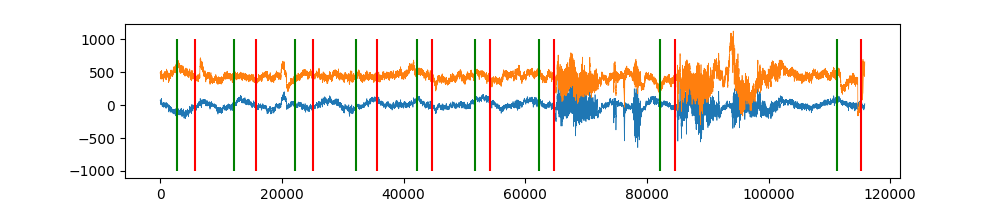

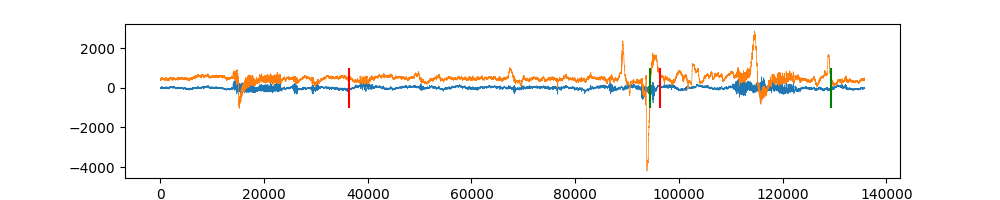

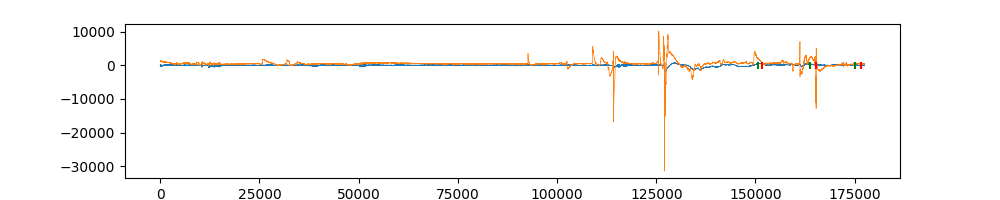

In [25]:
%matplotlib widget

for i in range(4):
    plt.figure(figsize=(10,2))
    plt.plot(np.array([nk_orig[i][7], bc_orig[i][7]]).T, linewidth=0.5)
    plt.vlines(on_c[i], -1000,1000, color='r')
    plt.vlines(on_o[i], -1000,1000, color='g')
    plt.show()
  


C:\Users\wickr\AppData\Local\Temp\ipykernel_21272\3832855766.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax1, ax2], labels=['NK','BC (Ours)'], loc='center right')


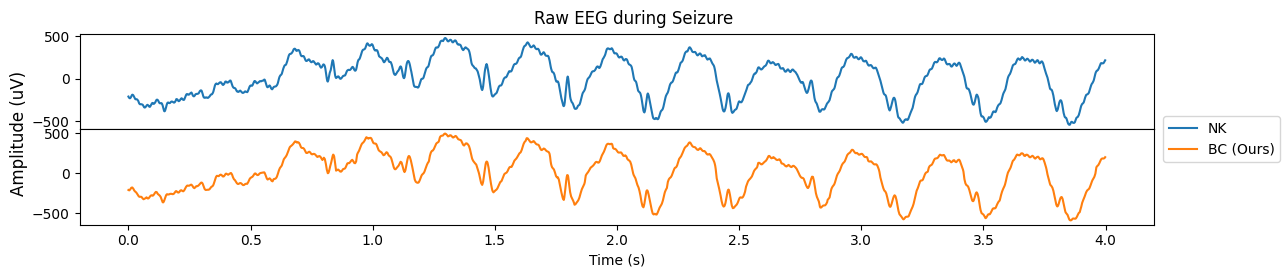

In [8]:
%matplotlib inline
# print(66275 - 67216)
# print(66321 - 67262)

start_point = 65000

nk = nk_orig[1][4][start_point:start_point+500*4]
bc = bc_orig[1][4][start_point:start_point+500*4]

nk = nk - np.mean(nk)
bc = bc - np.mean(bc)
t = np.array(range(500*4))/500

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(13,3))

ax1 = axs[0].plot(t, nk, color='tab:blue')
ax2 = axs[1].plot(t, bc, color='tab:orange')
axs[1].set_xlabel('Time (s)')
fig.supylabel('Amplitude (uV)')
fig.subplots_adjust(hspace=0)
fig.suptitle('Raw EEG during Seizure', y=0.91)
fig.tight_layout()
fig.legend([ax1, ax2], labels=['NK','BC (Ours)'], loc='center right')
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(hspace=0)
plt.show()

C:\Users\wickr\AppData\Local\Temp\ipykernel_21272\4216000324.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax1, ax2], labels=['NK','BC (Ours)'], loc='center right')


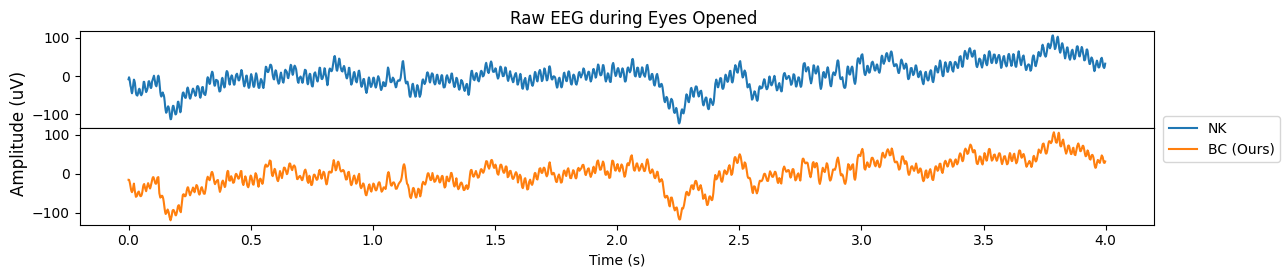

In [9]:
%matplotlib inline
# print(26992-26992+242*4)
# print(27010-27010+242*4)

start_point = 3500
nk = nk_orig[1][4][start_point:start_point+500*4]
bc = bc_orig[1][4][start_point:start_point+500*4]

nk = nk - np.mean(nk)
bc = bc - np.mean(bc)
t = np.array(range(500*4))/500

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(13,3))

ax1 = axs[0].plot(t, nk, color='tab:blue')
ax2 = axs[1].plot(t, bc, color='tab:orange')
axs[1].set_xlabel('Time (s)')
fig.supylabel('Amplitude (uV)')
fig.subplots_adjust(hspace=0)
fig.suptitle('Raw EEG during Eyes Opened', y=0.91)
fig.tight_layout()
fig.legend([ax1, ax2], labels=['NK','BC (Ours)'], loc='center right')
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(hspace=0)
plt.show()

C:\Users\wickr\AppData\Local\Temp\ipykernel_21272\2119061375.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax1, ax2], labels=['NK','BC (Ours)'], loc='center right')


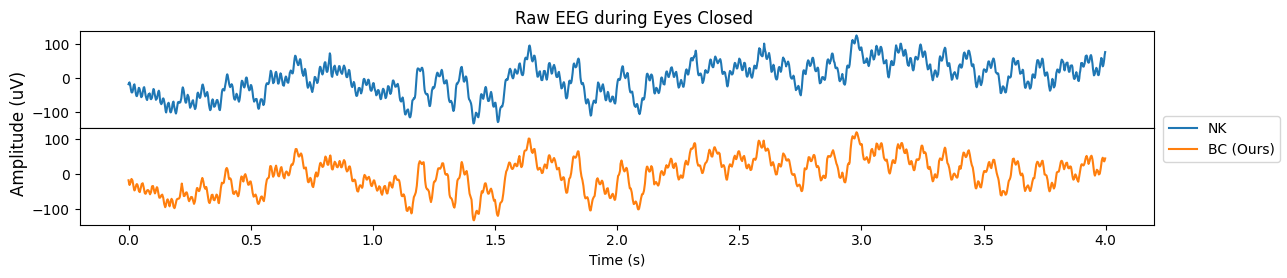

In [10]:
%matplotlib inline

start_point = 5750
nk = nk_orig[1][4][start_point:start_point+500*4]
bc = bc_orig[1][4][start_point:start_point+500*4]

nk = nk - np.mean(nk)
bc = bc - np.mean(bc)
t = np.array(range(500*4))/500

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(13,3))

ax1 = axs[0].plot(t, nk, color='tab:blue')
ax2 = axs[1].plot(t, bc, color='tab:orange')
axs[1].set_xlabel('Time (s)')
fig.supylabel('Amplitude (uV)')
fig.subplots_adjust(hspace=0)
fig.suptitle('Raw EEG during Eyes Closed', y=0.91)
fig.tight_layout()
fig.legend([ax1, ax2], labels=['NK','BC (Ours)'], loc='center right')
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(hspace=0)
plt.show()

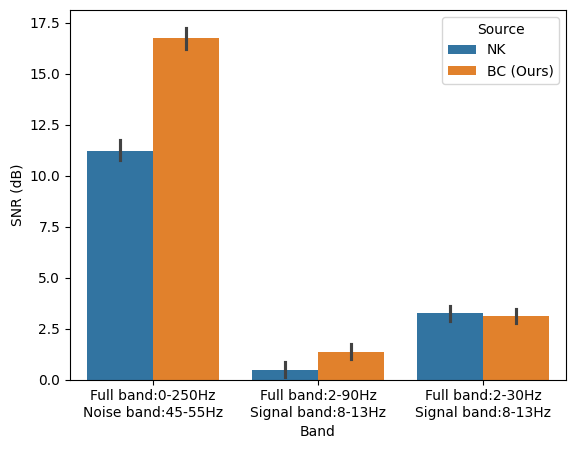

In [35]:
#SNR calculate and seaborn plot
import pandas as pd
import seaborn as sns
%matplotlib inline

df = {'Channel':[], 'SNR (dB)':[], 'Sample':[], 'Source':[], 'start':[], 'Band':[]}

for j in range(3,5):
    nk = nk_orig[1][j]
    bc = bc_orig[1][j]

    nk_ec = [nk[on_c[1][0]:on_o[1][1]], nk[on_c[1][1]:on_o[1][2]], nk[on_c[1][2]:on_o[1][3]], nk[on_c[1][3]:on_o[1][4]], nk[on_c[1][4]:on_o[1][5]], nk[on_c[1][5]:on_o[1][6]]]
    bc_ec = [bc[on_c[1][0]:on_o[1][1]], bc[on_c[1][1]:on_o[1][2]], bc[on_c[1][2]:on_o[1][3]], bc[on_c[1][3]:on_o[1][4]], bc[on_c[1][4]:on_o[1][5]], bc[on_c[1][5]:on_o[1][6]]]

    for k in range(len(nk_ec)):
        for l in range(0,len(nk_ec[k]),500):
            if l+500*8>len(nk_ec[k]):
                break
            nk = nk_ec[k][l:l+500*8]
            bc = bc_ec[k][l:l+500*8]

            nk = nk - np.mean(nk)
            bc = bc - np.mean(bc)
            b1, a1 = signal.cheby2(4, 40, [48,52], 'bandstop', fs=500)
            bc_filtered = signal.lfilter(b1, a1, bc)
            nk_filtered = signal.lfilter(b1, a1, nk)

            b1, a1 = signal.cheby2(4, 40, [48,52], 'bandpass', fs=500)
            # b2, a2 = signal.cheby2(4, 40, [8,13], 'bandstop', fs=500)
            bc_noise = signal.lfilter(b1, a1, bc)
            # bc_noise = signal.lfilter(b2, a2, bc_noise)
            nk_noise = signal.lfilter(b1, a1, nk)
            # nk_noise = signal.lfilter(b2, a2, nk_noise)
            # sns.lineplot(nk_noise)
            # sns.lineplot(bc_noise)
            # break

            nk_power = np.sum(nk_filtered**2)
            bc_power = np.sum(bc_filtered**2)
            nk_noise_power = np.sum(nk_noise**2)
            bc_noise_power = np.sum(bc_noise**2)
            nk_snr = 10*np.log10(nk_power/nk_noise_power)
            bc_snr = 10*np.log10(bc_power/bc_noise_power)
            # if bc_snr<nk_snr:
            # plt.figure(figsize=(10,5))
            # sns.lineplot(nk_noise)
            # sns.lineplot(bc_noise, label='filtered')
            # break
            df['Channel'].append(CHANNEL8[j])
            df['SNR (dB)'].append(nk_snr)
            df['Sample'].append(k)
            df['Source'].append('NK')
            df['start'].append(l)
            df['Band'].append('Full band:0-250Hz\nNoise band:45-55Hz')

            df['Channel'].append(CHANNEL8[j])
            df['SNR (dB)'].append(bc_snr)
            df['Sample'].append(k)
            df['Source'].append('BC (Ours)')
            df['start'].append(l)
            df['Band'].append('Full band:0-250Hz\nNoise band:45-55Hz')


for j in range(3,5):
    nk = nk_orig[1][j]
    bc = bc_orig[1][j]

    nk_ec = [nk[on_c[1][0]:on_o[1][1]], nk[on_c[1][1]:on_o[1][2]], nk[on_c[1][2]:on_o[1][3]], nk[on_c[1][3]:on_o[1][4]], nk[on_c[1][4]:on_o[1][5]], nk[on_c[1][5]:on_o[1][6]]]
    bc_ec = [bc[on_c[1][0]:on_o[1][1]], bc[on_c[1][1]:on_o[1][2]], bc[on_c[1][2]:on_o[1][3]], bc[on_c[1][3]:on_o[1][4]], bc[on_c[1][4]:on_o[1][5]], bc[on_c[1][5]:on_o[1][6]]]

    for k in range(len(nk_ec)):
        for l in range(0,len(nk_ec[k]),500):
            if l+500*8>len(nk_ec[k]):
                break
            nk = nk_ec[k][l:l+500*8]
            bc = bc_ec[k][l:l+500*8]

            nk = nk - np.mean(nk)
            bc = bc - np.mean(bc)
            b1, a1 = signal.cheby2(4, 40, [8,13], 'bandpass', fs=500)
            bc_filtered = signal.lfilter(b1, a1, bc)
            nk_filtered = signal.lfilter(b1, a1, nk)

            b1, a1 = signal.cheby2(4, 40, [2,90], 'bandpass', fs=500)
            b2, a2 = signal.cheby2(4, 40, [8,13], 'bandstop', fs=500)
            bc_noise = signal.lfilter(b1, a1, bc)
            bc_noise = signal.lfilter(b2, a2, bc_noise)
            nk_noise = signal.lfilter(b1, a1, nk)
            nk_noise = signal.lfilter(b2, a2, nk_noise)
            # sns.lineplot(nk_noise)
            # sns.lineplot(bc_noise)
            # break

            nk_power = np.sum(nk_filtered**2)
            bc_power = np.sum(bc_filtered**2)
            nk_noise_power = np.sum(nk_noise**2)
            bc_noise_power = np.sum(bc_noise**2)
            nk_snr = 10*np.log10(nk_power/nk_noise_power)
            bc_snr = 10*np.log10(bc_power/bc_noise_power)
            # if bc_snr<nk_snr:
            # plt.figure(figsize=(10,5))
            # sns.lineplot(nk_noise)
            # sns.lineplot(bc_noise, label='filtered')
            # break
            df['Channel'].append(CHANNEL8[j])
            df['SNR (dB)'].append(nk_snr)
            df['Sample'].append(k)
            df['Source'].append('NK')
            df['start'].append(l)
            df['Band'].append('Full band:2-90Hz\nSignal band:8-13Hz')

            df['Channel'].append(CHANNEL8[j])
            df['SNR (dB)'].append(bc_snr)
            df['Sample'].append(k)
            df['Source'].append('BC (Ours)')
            df['start'].append(l)
            df['Band'].append('Full band:2-90Hz\nSignal band:8-13Hz')


for j in range(3,5):
    nk = nk_orig[1][j]
    bc = bc_orig[1][j]

    nk_ec = [nk[on_c[1][0]:on_o[1][1]], nk[on_c[1][1]:on_o[1][2]], nk[on_c[1][2]:on_o[1][3]], nk[on_c[1][3]:on_o[1][4]], nk[on_c[1][4]:on_o[1][5]], nk[on_c[1][5]:on_o[1][6]]]
    bc_ec = [bc[on_c[1][0]:on_o[1][1]], bc[on_c[1][1]:on_o[1][2]], bc[on_c[1][2]:on_o[1][3]], bc[on_c[1][3]:on_o[1][4]], bc[on_c[1][4]:on_o[1][5]], bc[on_c[1][5]:on_o[1][6]]]

    for k in range(len(nk_ec)):
        for l in range(0,len(nk_ec[k]),500):
            if l+500*8>len(nk_ec[k]):
                break
            nk = nk_ec[k][l:l+500*8]
            bc = bc_ec[k][l:l+500*8]

            nk = nk - np.mean(nk)
            bc = bc - np.mean(bc)
            b1, a1 = signal.cheby2(4, 40, [8,13], 'bandpass', fs=500)
            bc_filtered = signal.lfilter(b1, a1, bc)
            nk_filtered = signal.lfilter(b1, a1, nk)

            b1, a1 = signal.cheby2(4, 40, [2,30], 'bandpass', fs=500)
            b2, a2 = signal.cheby2(4, 40, [8,13], 'bandstop', fs=500)
            bc_noise = signal.lfilter(b1, a1, bc)
            bc_noise = signal.lfilter(b2, a2, bc_noise)
            nk_noise = signal.lfilter(b1, a1, nk)
            nk_noise = signal.lfilter(b2, a2, nk_noise)
            # sns.lineplot(nk_noise)
            # sns.lineplot(bc_noise)
            # break

            nk_power = np.sum(nk_filtered**2)
            bc_power = np.sum(bc_filtered**2)
            nk_noise_power = np.sum(nk_noise**2)
            bc_noise_power = np.sum(bc_noise**2)
            nk_snr = 10*np.log10(nk_power/nk_noise_power)
            bc_snr = 10*np.log10(bc_power/bc_noise_power)
            # if bc_snr<nk_snr:
            # plt.figure(figsize=(10,5))
            # sns.lineplot(nk_noise)
            # sns.lineplot(bc_noise, label='filtered')
            # break
            df['Channel'].append(CHANNEL8[j])
            df['SNR (dB)'].append(nk_snr)
            df['Sample'].append(k)
            df['Source'].append('NK')
            df['start'].append(l)
            df['Band'].append('Full band:2-30Hz\nSignal band:8-13Hz')

            df['Channel'].append(CHANNEL8[j])
            df['SNR (dB)'].append(bc_snr)
            df['Sample'].append(k)
            df['Source'].append('BC (Ours)')
            df['start'].append(l)
            df['Band'].append('Full band:2-30Hz\nSignal band:8-13Hz')

plt.figure()
sns.barplot(df, y='SNR (dB)', x="Band", hue='Source', errorbar='ci')
plt.show()

plotting


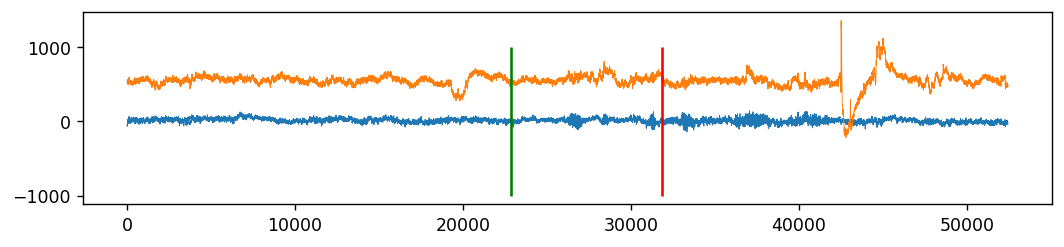

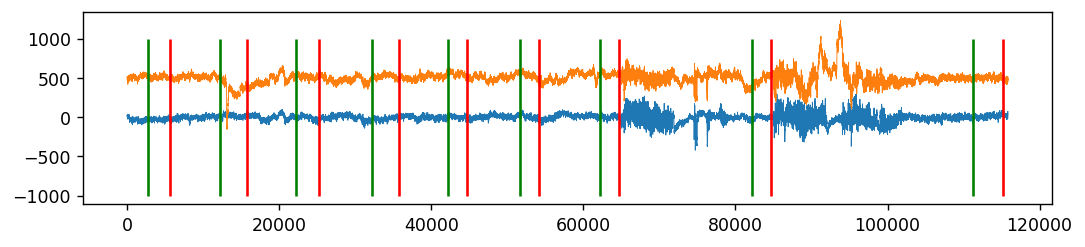

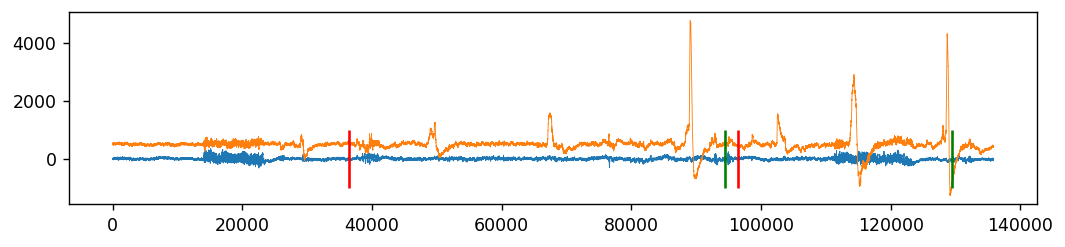

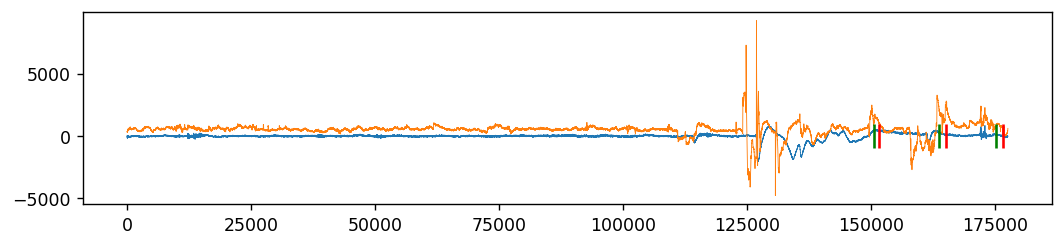

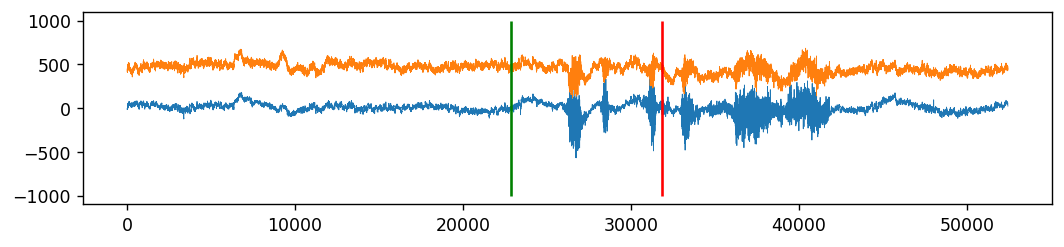

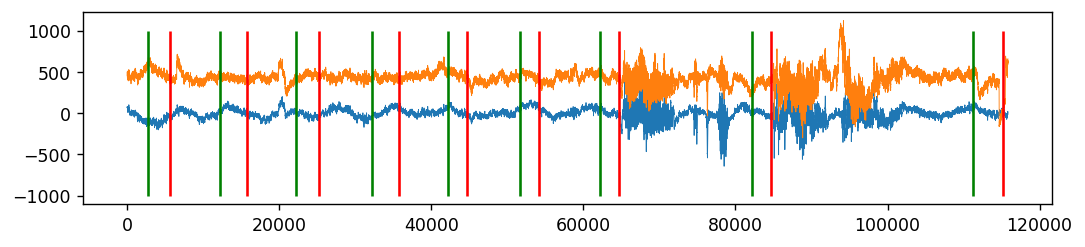

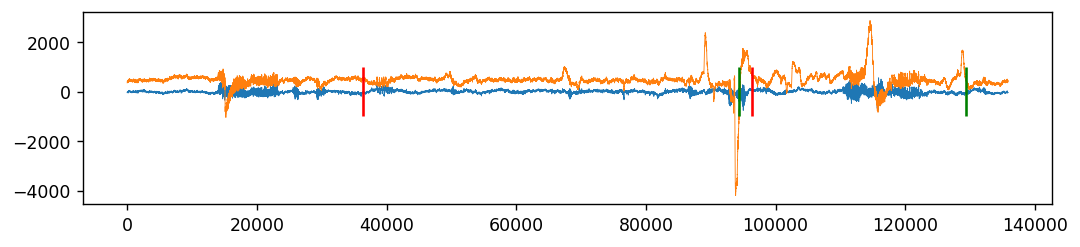

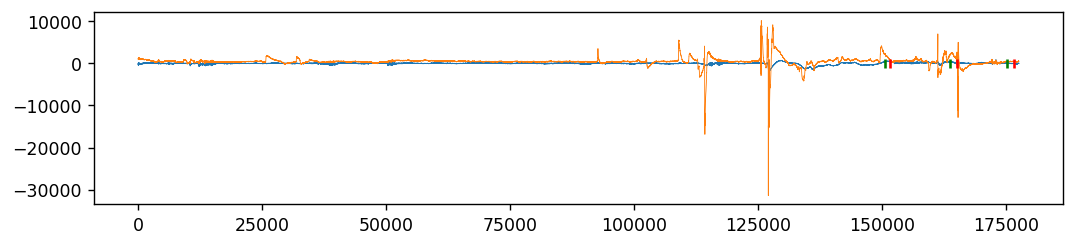

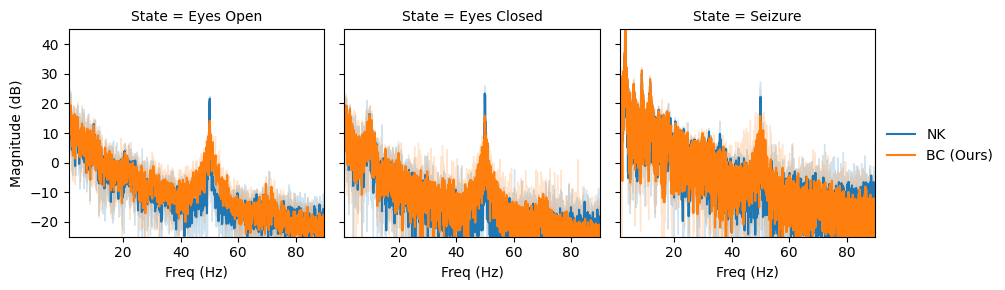

In [26]:
%matplotlib inline

df = {'Channel':[], 'Freq (Hz)':[], 'Magnitude (dB)':[], 'State':[], 'Source':[], 'Sample':[]}

for channel in range(3, 5):
    nk = nk_orig[1][channel]
    bc = bc_orig[1][channel]

    # ### no movement ####
    # nk = np.concatenate((nk[0:93170], nk[128744:182710]))
    # bc = np.concatenate((bc[0:93170], bc[128744:182710]))

    #### eye open ####
    nk_eo = [nk[on_o[1][0]:on_c[1][0]], nk[on_o[1][1]:on_c[1][1]], nk[on_o[1][2]:on_c[1][2]], nk[on_o[1][3]:on_c[1][3]], nk[on_o[1][4]:on_c[1][4]], nk[on_o[1][5]:on_c[1][5]], nk[on_o[1][6]:on_c[1][6]]]
    bc_eo = [bc[on_o[1][0]:on_c[1][0]], bc[on_o[1][1]:on_c[1][1]], bc[on_o[1][2]:on_c[1][2]], bc[on_o[1][3]:on_c[1][3]], bc[on_o[1][4]:on_c[1][4]], bc[on_o[1][5]:on_c[1][5]], bc[on_o[1][6]:on_c[1][6]]]

    #### eye closed ####
    nk_ec = [nk[on_c[1][0]:on_o[1][1]], nk[on_c[1][1]:on_o[1][2]], nk[on_c[1][2]:on_o[1][3]], nk[on_c[1][3]:on_o[1][4]], nk[on_c[1][4]:on_o[1][5]], nk[on_c[1][5]:on_o[1][6]]]
    bc_ec = [bc[on_c[1][0]:on_o[1][1]], bc[on_c[1][1]:on_o[1][2]], bc[on_c[1][2]:on_o[1][3]], bc[on_c[1][3]:on_o[1][4]], bc[on_c[1][4]:on_o[1][5]], bc[on_c[1][5]:on_o[1][6]]]
    # nk_ec = nk_ec[:len(nk_eo)]
    # bc_ec = bc_ec[:len(bc_eo)]

    #### seizure ####
    nk_s = [nk[65100:71980], nk[85302:92000], nk[93840:100000]]
    bc_s = [bc[65100:71980], bc[85302:92000], bc[93840:100000]]
    # nk_s = nk_s[:len(nk_eo)]
    # bc_s = bc_s[:len(bc_eo)]

    def gen():
        for i in range(len(nk_eo)):
            yield nk_eo[i], 'Eyes Open', i, 'NK'
            yield bc_eo[i], 'Eyes Open', i, 'BC (Ours)'
        for i in range(len(nk_ec)):
            yield nk_ec[i], 'Eyes Closed', i, 'NK'
            yield bc_ec[i], 'Eyes Closed', i, 'BC (Ours)'
        for i in range(len(nk_s)):
            yield nk_s[i], 'Seizure', i, 'NK'
            yield bc_s[i], 'Seizure', i, 'BC (Ours)'

    for s, state, sample, source in gen():
        N = len(s)
        fft_s = 20 * np.log10(2.0/N*np.abs(fft(s)[0:N//2]))
        freq = fftfreq(N, 1/500)[:N//2]
        df['Freq (Hz)'] += list(freq)
        df['Magnitude (dB)'] += list(fft_s)
        df['State'] += [state]*len(freq)
        df['Source'] += [source]*len(freq)
        df['Sample'] += [sample]*len(freq)
        df['Channel'] += [CHANNEL8[channel]]*len(freq)

df = pd.DataFrame(df)
print('plotting')
# plt.figure()
g = sns.FacetGrid(df, col="State", despine=False)
g.map_dataframe(sns.lineplot, x='Freq (Hz)', y='Magnitude (dB)', hue='Source', errorbar=('se',2))
g.add_legend()
g.set(xlim=(1,90), ylim=(-25,45))

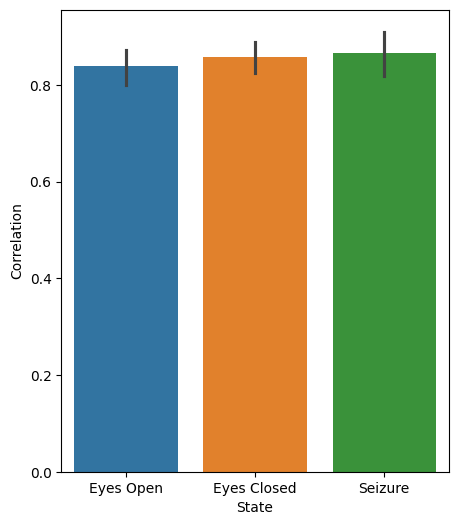

In [27]:
# Correlation
%matplotlib inline
df = {'Channel':[], 'Correlation':[], 'State':[], 'Sample':[]}

for channel in range(8):
    nk = nk_orig[1][channel]
    bc = bc_orig[1][channel]

    ### movement ####
    nk_m = nk_orig[3][channel][80000:170000]
    bc_m = bc_orig[3][channel][80000:170000]

    #### eye open ####
    nk_eo = [nk[on_o[1][0]:on_c[1][0]], nk[on_o[1][1]:on_c[1][1]], nk[on_o[1][2]:on_c[1][2]], nk[on_o[1][3]:on_c[1][3]], nk[on_o[1][4]:on_c[1][4]], nk[on_o[1][5]:on_c[1][5]], nk[on_o[1][6]:on_c[1][6]]]
    bc_eo = [bc[on_o[1][0]:on_c[1][0]], bc[on_o[1][1]:on_c[1][1]], bc[on_o[1][2]:on_c[1][2]], bc[on_o[1][3]:on_c[1][3]], bc[on_o[1][4]:on_c[1][4]], bc[on_o[1][5]:on_c[1][5]], bc[on_o[1][6]:on_c[1][6]]]

    #### eye closed ####
    nk_ec = [nk[on_c[1][0]:on_o[1][1]], nk[on_c[1][1]:on_o[1][2]], nk[on_c[1][2]:on_o[1][3]], nk[on_c[1][3]:on_o[1][4]], nk[on_c[1][4]:on_o[1][5]], nk[on_c[1][5]:on_o[1][6]]]
    bc_ec = [bc[on_c[1][0]:on_o[1][1]], bc[on_c[1][1]:on_o[1][2]], bc[on_c[1][2]:on_o[1][3]], bc[on_c[1][3]:on_o[1][4]], bc[on_c[1][4]:on_o[1][5]], bc[on_c[1][5]:on_o[1][6]]]
    # nk_ec = nk_ec[:len(nk_eo)]
    # bc_ec = bc_ec[:len(bc_eo)]


    #### seizure ####
    nk_s = [nk[65100:71980], nk[85302:92000], nk[93840:100000], nk_orig[2][channel][14110:23400]]
    bc_s = [bc[65100:71980], bc[85302:92000], bc[93840:100000], bc_orig[2][channel][14110:23400]]
    # nk_s = nk_s[:len(nk_eo)]
    # bc_s = bc_s[:len(bc_eo)]

    def gen():
        for i in range(len(nk_eo)):
            yield nk_eo[i], bc_eo[i], 'Eyes Open', i
        for i in range(len(nk_ec)):
            yield nk_ec[i], bc_ec[i], 'Eyes Closed', i  
        for i in range(len(nk_s)):
            yield nk_s[i], bc_s[i], 'Seizure', i
        # yield nk_m, bc_m, 'Movement', 0

    for nk, bc, state, sample in gen():
        nk = nk - np.mean(nk)
        bc = bc - np.mean(bc)
        b1, a1 = signal.cheby2(4, 40, [2,30], 'bandpass', fs=500)
        bc = signal.lfilter(b1, a1, bc)
        nk = signal.lfilter(b1, a1, nk)
        corr, _ = pearsonr(nk, bc)
        df['Channel'].append(CHANNEL8[channel])
        df['Correlation'].append(corr)
        df['State'].append(state)
        df['Sample'].append(sample)

df = pd.DataFrame(df)
plt.figure(figsize=(5,6))
# g.map_dataframe(sns.barplot, x='State', y='Correlation', hue='Sample')
ax = sns.barplot(data=df, x='State', y='Correlation', hue='State')
# sns.move_legend(ax, "upper center", bbox_to_anchor=(1.07, 1))
# sns.catplot(df, kind="bar",x="State", y="Correlation", hue="Channel", )